### Analysis of a "__lab2.csv__" (it is a triple alpha spectra) 
Activities:
+ Load data
+ Define analysis functions
+ Applying the methods
+ Plotting the results

In [34]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.signal import find_peaks, peak_prominences, peak_widths
plt.style.use('bmh')

+ #### Utilizando scipy.signal import find_peaks, peak_prominences, peak_widths

In [35]:
def read_data(name='lab2.csv'):
    df = pd.read_csv(name)
    x = df.channel
    y = df.counts
   # print(df.head())
    return df,x,y

In [36]:
def plot_data(df,interval_a, interval_b):

    x = df.channel
    y = df.counts

    fig, ax = plt.subplots()
    ax.plot(x,y, 'b.-')
    ax.set_xlim(interval_a,interval_b) #450, 560
    plt.title("Fuente triple alpha",fontweight="bold")
    plt.xlabel(r'Channel')
    plt.ylabel(r'Counts')
    #plt.savefig("fig.png", dpi=150)
    plt.show()
    

In [37]:
def peak_find(y):
    peaks, dict_properties = find_peaks(y, height=1000, distance=10)
    return peaks, dict_properties

In [38]:
def prominence(y, peaks):
    prominences, left_bases, right_bases = peak_prominences(y, peaks)
    return prominences, left_bases, right_bases

In [60]:
def plot_peak(x,y,peaks):

    fig, ax = plt.subplots()
    ax.plot(x,y,'b.-')
    ax.plot(peaks, y[peaks], 'v', ms=10, mfc='red')
    ax.set_xlim(450,560) #450, 560
    plt.title("Peaks",fontweight="bold")
    plt.xlabel(r'Channel')
    plt.ylabel(r'Counts')
    plt.show()

In [51]:
def linear_fit(channel, energy):
    result = linregress(channel, energy)
    return result

# Applying the methods

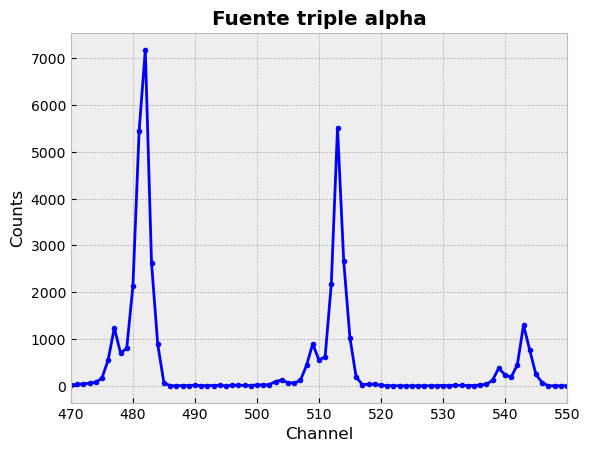

In [52]:
data, x, y = read_data(name='lab2.csv')
plot_data(data, interval_a=470, interval_b=550)

In [54]:
peaks, dict_properties = peak_find(y)
prominences, left_bases, right_bases = prominence(y, peaks)

print("="*30)
print("peaks -> ",peaks)
print("eval -> ", [ y[peaks[i] ] for i in range(len(peaks)) ] )

print("="*30)
print("prom ->", prominences)
print("="*30)

# dict_properties['peak_heights']

peaks ->  [482 513 543]
eval ->  [7183, 5518, 1299]
prom -> [7183. 5517. 1299.]


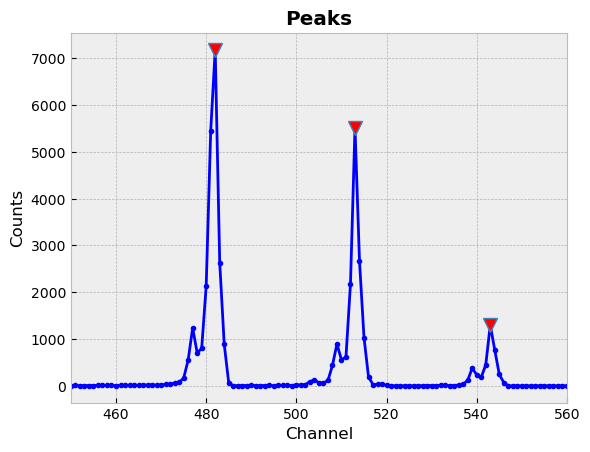

In [61]:
plot_peak(x,y,peaks)

In [62]:
energy = np.array([5155, 5486, 5805])
channel_mean = np.array(peaks)

result = linear_fit(channel_mean, energy)

print(f"Slope-> {result.slope:.2f} +- {result.stderr:.2f}")
print(f"Intercept-> {result.intercept:.2f} +- {result.intercept_stderr:.2f}")
print(f"R-squared-> {result.rvalue:.8f}")

Slope-> 10.66 +- 0.01
Intercept-> 19.10 +- 6.53
R-squared-> 0.99999929


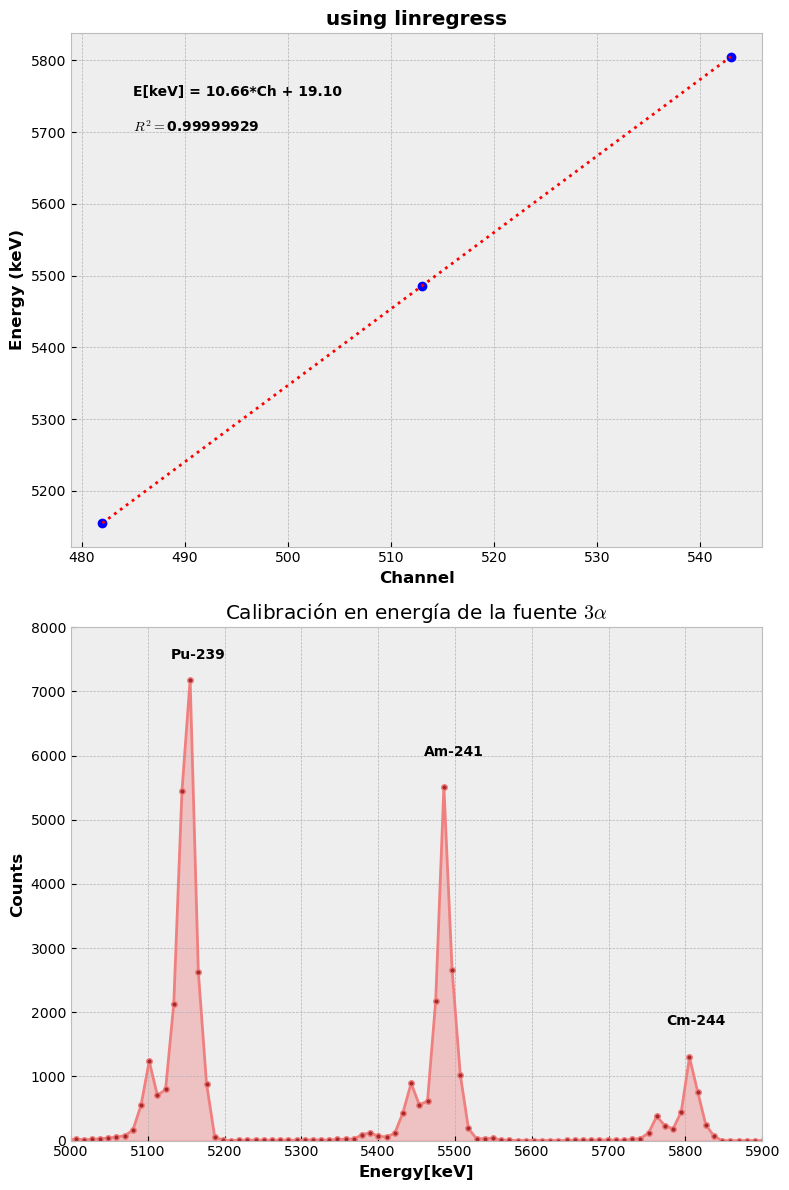

In [65]:
x_ = np.linspace(channel_mean.min(),channel_mean.max(),100)
data['e_'] = data.channel * result.slope + result.intercept  
e_ = data['e_']
c_ = data.counts

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,12))

ax1.plot(channel_mean, energy, c='b', marker='o', ls="")
ax1.plot(x_, x_ * result.slope + result.intercept, 'r:')
ax1.set_ylabel(r'Energy (keV)', weight='bold')
ax1.set_xlabel(r'Channel', weight='bold')
ax1.set_title(r"using linregress", weight='bold')
ax1.text(485,5750,f"E[keV] = {result.slope:.2f}*Ch + {result.intercept:.2f}", weight='bold')
ax1.text(485,5700,f"$R^{2}=${result.rvalue.round(8)}", weight='bold')

ax2.plot(e_, c_, 'o-', color="lightcoral", ms=4, mfc='brown')
ax2.fill_between(e_, c_, 0, color="lightcoral", alpha=0.4, linestyle="")
ax2.set_xlim(5000,5900)
ax2.set_ylim(0,8000)
ax2.text(5130,7500,f"Pu-239", weight='bold')
ax2.text(5460,6000,f"Am-241", weight='bold')
ax2.text(5775,1800,f"Cm-244", weight='bold')
ax2.set_title(r"Calibración en energía de la fuente $\mathbf{3\alpha}$", weight='normal')
ax2.set_xlabel(r'Energy[keV]',weight='bold')
ax2.set_ylabel(r'Counts', weight='bold')

plt.tight_layout()
plt.savefig("fig.png", dpi=200)
plt.show()